In [11]:
from hdr_processing.HDR import HDR
import cv2
import matplotlib.pyplot as plt
import sys
import objgraph

In [12]:
hdr = HDR("master_room_photos")

Images aligned


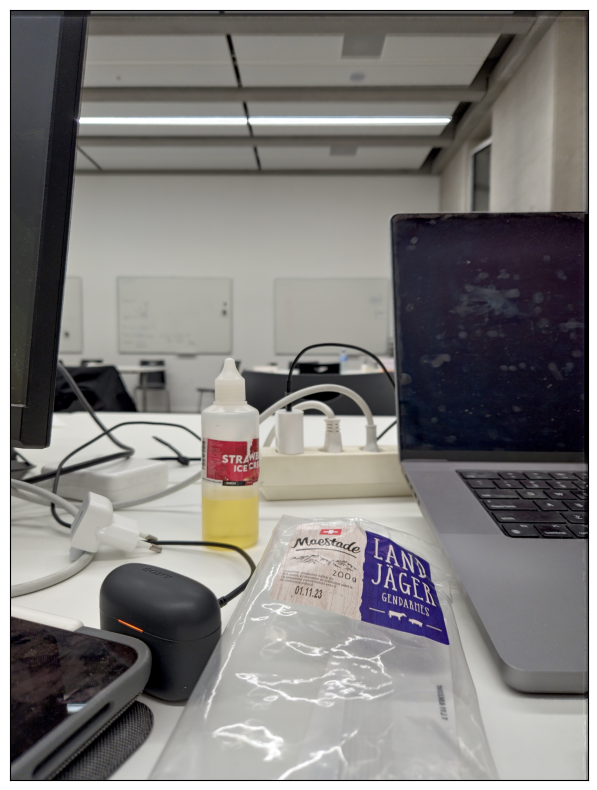

In [13]:
hdr.extract_exif()
hdr.extract_exposure_times()
hdr.align_images()
hdr.process_exposure_fusion()
hdr.show_fusion_image()

Calibrated


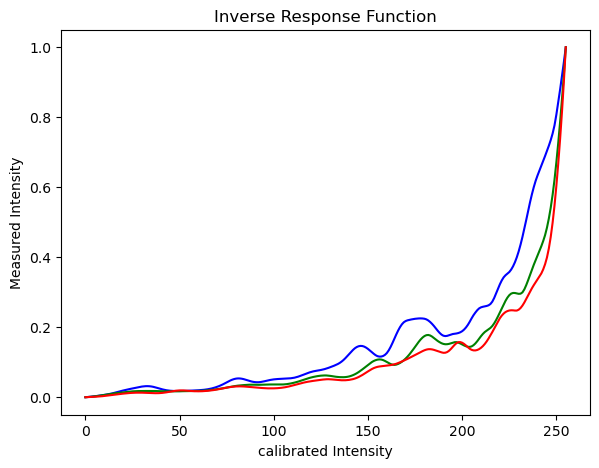

In [14]:
hdr.calibrate_debevec()
hdr.plot_camera_inv_response()

Merged


([], [])

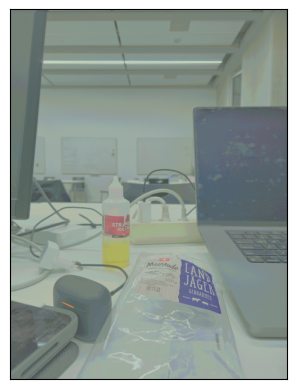

In [15]:
image_processed=hdr.process_tone_map_reinhard()
rgb = cv2.cvtColor(image_processed.copy(), cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.xticks([])
plt.yticks([])

In [16]:
def get_object_size(obj, seen=None):
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    seen.add(obj_id)
    size = sys.getsizeof(obj)
    if hasattr(obj, '__dict__'):
        size += get_object_size(obj.__dict__, seen)
    if hasattr(obj, '__iter__') and not isinstance(obj, str):
        size += sum(get_object_size(item, seen) for item in obj)
    return size

In [18]:


objgraph.show_refs([hdr], filename='memory_usage.png')

memory_size = get_object_size(hdr)
print(f"Memory usage of hdr: {memory_size} bytes")
print(f"Memory usage of hdr: {memory_size / (1000 * 1000)} megabytes")


Graph written to /var/folders/h5/5kxq3mpn6k727pnd4rn5bg8c0000gn/T/objgraph-9sc1jcir.dot (36 nodes)
Image generated as memory_usage.png
Memory usage of hdr: 1221 bytes
Memory usage of hdr: 0.001221 megabytes
